# IPL Data Analysis
[Dataset Link](https://www.kaggle.com/datasets/ramjidoolla/ipl-data-set)

## Importing Libraries

In [301]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind, pearsonr, chi2_contingency
import sklearn

## Data Loading

In [302]:
matches_df = pd.read_csv('dataset/matches.csv')
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [303]:
runs_df = pd.read_csv('dataset/most_runs_average_strikerate.csv')
runs_df.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


In [304]:
deliveries_df = pd.read_csv('dataset/deliveries.csv')
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [305]:
teams_df = pd.read_csv('dataset/teamwise_home_and_away.csv')
teams_df.head()

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222


## Data Preprocessing

### Processing Matches Data

Converting season column to year format

In [306]:
# Finding the seasons in the dataset
matches_df['Season'].unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

In [307]:
# Converting the season column to years for better understanding
matches_df['Season'] = matches_df['Season'].apply(lambda x: x.split('-')[1])
matches_df['Season'] = matches_df['Season'].astype(int)
matches_df['Season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

Converting date column to datetime format

In [308]:
# Converting the date to datetime format for better analysis
matches_df["date"] = pd.to_datetime(matches_df["date"], format='mixed')
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-05-04,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-06-04,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-07-04,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-08-04,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-08-04,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


Sorting the data based on the date for better understanding

In [309]:
# Sorting matches data by date
matches_df = matches_df.sort_values(by='date')
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
76,77,2008,Hyderabad,2008-01-05,Deccan Chargers,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,SE Marsh,"Rajiv Gandhi International Stadium, Uppal",BR Doctrove,RB Tiffin,NaN
77,78,2008,Jaipur,2008-01-05,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,Rajasthan Royals,45,0,SA Asnodkar,Sawai Mansingh Stadium,RE Koertzen,GA Pratapkumar,NaN
116,117,2008,Mumbai,2008-01-06,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN
78,79,2008,Chennai,2008-02-05,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Delhi Daredevils,0,8,V Sehwag,"MA Chidambaram Stadium, Chepauk",BF Bowden,K Hariharan,NaN
110,111,2008,Bangalore,2008-03-05,Royal Challengers Bangalore,Deccan Chargers,Deccan Chargers,field,normal,0,Royal Challengers Bangalore,3,0,P Kumar,M Chinnaswamy Stadium,BR Doctrove,SL Shastri,NaN


### Transforming team names

In [310]:
matches_df['team1'].unique()

array(['Deccan Chargers', 'Rajasthan Royals', 'Chennai Super Kings',
       'Royal Challengers Bangalore', 'Kings XI Punjab', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Pune Warriors',
       'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [311]:
matches_df['team1'] = matches_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
matches_df['team2'] = matches_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

matches_df['team1'] = matches_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches_df['team2'] = matches_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

matches_df['team1'] = matches_df['team1'].apply(lambda x: 'Rising Pune Supergiants' if x == 'Rising Pune Supergiant' else x)
matches_df['team2'] = matches_df['team2'].apply(lambda x: 'Rising Pune Supergiants' if x == 'Rising Pune Supergiant' else x)

matches_df['team1'] = matches_df['team1'].str.replace('Pune Warriors','Rising Pune Supergiants')
matches_df['team2'] = matches_df['team2'].str.replace('Pune Warriors','Rising Pune Supergiants')

In [312]:
matches_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Rajasthan Royals', 'Chennai Super Kings',
       'Royal Challengers Bangalore', 'Kings XI Punjab', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Delhi Capitals',
       'Rising Pune Supergiants', 'Kochi Tuskers Kerala', 'Gujarat Lions'],
      dtype=object)

#### Handling missing values

In [313]:
# Find out all the missing values in the dataset
matches_df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

Columns with missing values:
- city
- winner
- player_of_match
- umpire1
- umpire2
- umpire3

Filling missing values in city column

In [314]:
# see the missing city records
matches_df[matches_df.city.isnull()]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [315]:
# Filling the city column with Dubai as all the missing city values has venue Dubai Stadium
matches_df.city = matches_df.city.fillna('Dubai')
print("Null values in City =",matches_df.city.isnull().sum())

Null values in City = 0


Filling missing values in winner column

In [316]:
# See the missing winner records
matches_df[matches_df.winner.isnull()]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Capitals,Rising Pune Supergiants,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,2019-04-30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [317]:
# Filling the winner column with draw as all the missing values are for the matches which are draw
matches_df.winner = matches_df.winner.fillna('draw')
print("Null values in Winner =",matches_df.winner.isnull().sum())

Null values in Winner = 0


Filling missing values in player_of_match column

In [318]:
# Filling the player of the match column with the most frequent player as all the missing values are for the matches which are drawn
most_freq_player_of_match = matches_df['player_of_match'].mode()[0]
matches_df['player_of_match'] = matches_df['player_of_match'].fillna(most_freq_player_of_match)
print("Null values in Player of the Match =",matches_df['player_of_match'].isnull().sum())

Null values in Player of the Match = 0


Filling missing values in umpire1, umpire2 and umpire3 columns

In [319]:
# Filling umpire1 and umpire2 columns with the most frequent umpire1 and umpire2
matches_df['umpire1'] = matches_df['umpire1'].fillna(matches_df['umpire1'].mode()[0])
matches_df['umpire2'] = matches_df['umpire2'].fillna(matches_df['umpire2'].mode()[0])
print("Null values in Umpire1 =",matches_df['umpire1'].isnull().sum())
print("Null values in Umpire2 =",matches_df['umpire2'].isnull().sum())

Null values in Umpire1 = 0
Null values in Umpire2 = 0


In [320]:
# Drop the umpire3 column as it has too many missing values
matches_df = matches_df.drop('umpire3', axis=1)

#### Creating new columns for analysis

In [321]:
# Get the match scores for each match and store the in new columns of team1_score and team2_score
matches_df['team1_score'] = 0
matches_df['team2_score'] = 0
for index, row in matches_df.iterrows():
    team1_score = deliveries_df[(deliveries_df['match_id'] == row['id']) & (deliveries_df['inning'] == 1)]['total_runs'].sum()
    team2_score = deliveries_df[(deliveries_df['match_id'] == row['id']) & (deliveries_df['inning'] == 2)]['total_runs'].sum()
    matches_df.at[index, 'team1_score'] = team1_score
    matches_df.at[index, 'team2_score'] = team2_score
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,team1_score,team2_score
76,77,2008,Hyderabad,2008-01-05,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,SE Marsh,"Rajiv Gandhi International Stadium, Uppal",BR Doctrove,RB Tiffin,164,167
77,78,2008,Jaipur,2008-01-05,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,Rajasthan Royals,45,0,SA Asnodkar,Sawai Mansingh Stadium,RE Koertzen,GA Pratapkumar,196,151
116,117,2008,Mumbai,2008-01-06,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,163,164
78,79,2008,Chennai,2008-02-05,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,normal,0,Delhi Daredevils,0,8,V Sehwag,"MA Chidambaram Stadium, Chepauk",BF Bowden,K Hariharan,169,172
110,111,2008,Bangalore,2008-03-05,Royal Challengers Bangalore,Sunrisers Hyderabad,Deccan Chargers,field,normal,0,Royal Challengers Bangalore,3,0,P Kumar,M Chinnaswamy Stadium,BR Doctrove,SL Shastri,156,153


### Processing Deliveries Data

Sorting the deliveries data by season

In [322]:
deliveries_df = deliveries_df.merge(matches_df[['id', 'Season']], left_on='match_id', right_on='id')
deliveries_df = deliveries_df.sort_values(by=['Season', 'id'])
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,Season
13862,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,0,0,1,1,NaN,NaN,NaN,60,2008
13863,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,NaN,NaN,NaN,60,2008
13864,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,1,1,NaN,NaN,NaN,60,2008
13865,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,NaN,NaN,NaN,60,2008
13866,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,NaN,NaN,NaN,60,2008


## Exploratory Analysis and Visualization

Number of matches played in each city

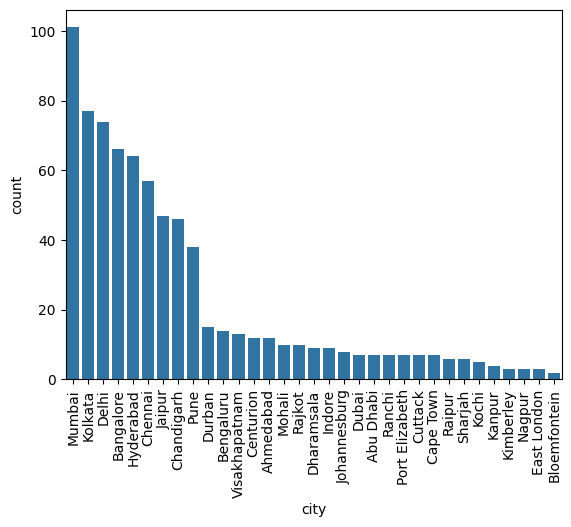

In [323]:
# Number of matches played in each city
sns.countplot(x='city', data=matches_df, order = matches_df['city'].value_counts().index)
plt.xticks(rotation='vertical')
plt.show()

Distribution of win_by_runs

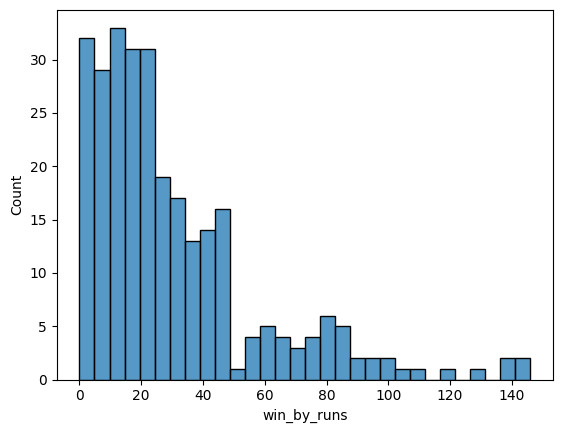

In [324]:
# Distribution of win_by_runs
sns.histplot(matches_df[matches_df['team1'] == matches_df['winner']]['win_by_runs'], bins=30)
plt.show()

Distribution of win_by_wickets

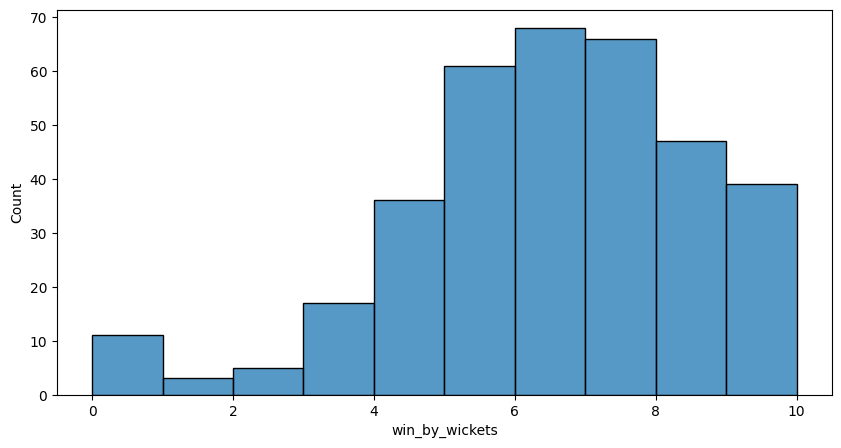

In [325]:
# Distribution of win_by_wickets
plt.figure(figsize=(10, 5))
sns.histplot(matches_df[matches_df['team2'] == matches_df['winner']]['win_by_wickets'], bins=10)
plt.show()

Winning ratio of teams by the number of matches played by them

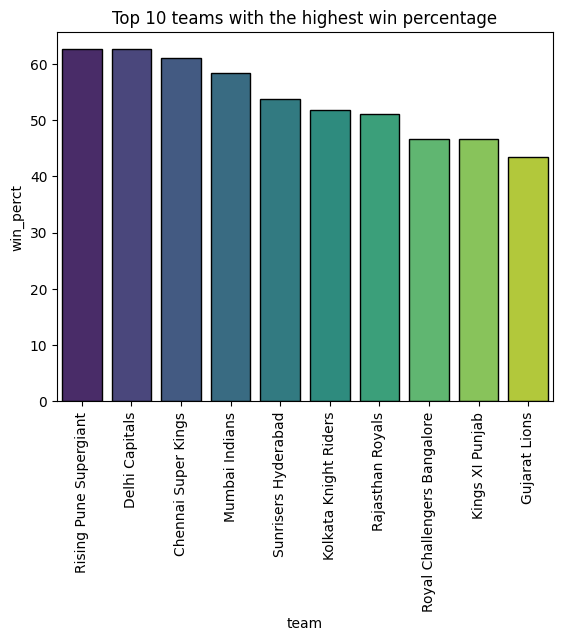

In [326]:
# Winning ratio of teams by the number of matches played by them
teams_df = pd.read_csv('dataset/teamwise_home_and_away.csv')
teams_df['win_perct'] = (teams_df['home_wins'] + teams_df['away_wins']) * 100 / (teams_df['home_matches'] + teams_df['away_matches'])
plt.title('Top 10 teams with the highest win percentage')
sns.barplot(x='team', y='win_perct', 
            data=teams_df.sort_values(by='win_perct', ascending=False).head(10),
            palette='viridis', edgecolor='black', hue='team')
plt.xticks(rotation='vertical')
plt.show()

Highest average and strike rates with a minimum of 3000 runs

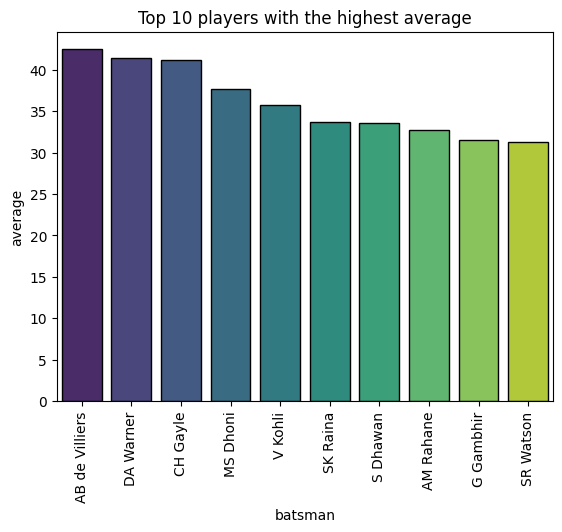

In [327]:
# Highest average and strike rates with a minimum of 3000 runs
runs_df = pd.read_csv('dataset/most_runs_average_strikerate.csv')
batters_df = runs_df[runs_df['total_runs'] > 3000]
plt.title('Top 10 players with the highest average')
sns.barplot(x='batsman', y='average', 
            data=batters_df.sort_values(by="average", ascending=False).head(10),
            palette='viridis', edgecolor='black', hue='batsman')
plt.xticks(rotation='vertical')
plt.show()

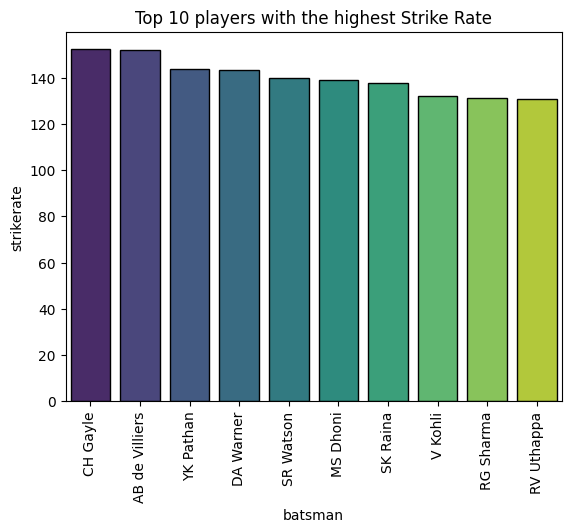

In [328]:
plt.title('Top 10 players with the highest Strike Rate')
sns.barplot(x='batsman', y='strikerate', 
            data=batters_df.sort_values(by="strikerate", ascending=False).head(10),
            palette='viridis', edgecolor='black', hue='batsman')
plt.xticks(rotation='vertical')
plt.show()

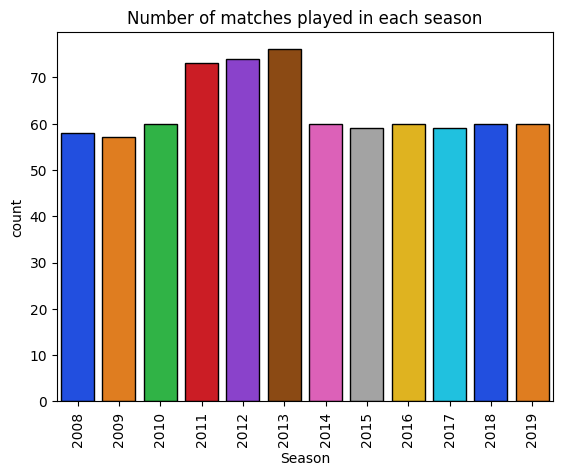

In [329]:
# Number of matches played in each season
plt.title('Number of matches played in each season')
sns.countplot(x='Season', data=matches_df, palette='bright', edgecolor='black', hue='Season', legend=False)
plt.xticks(rotation='vertical')
plt.show()

Most player of the match awards sorted first 10

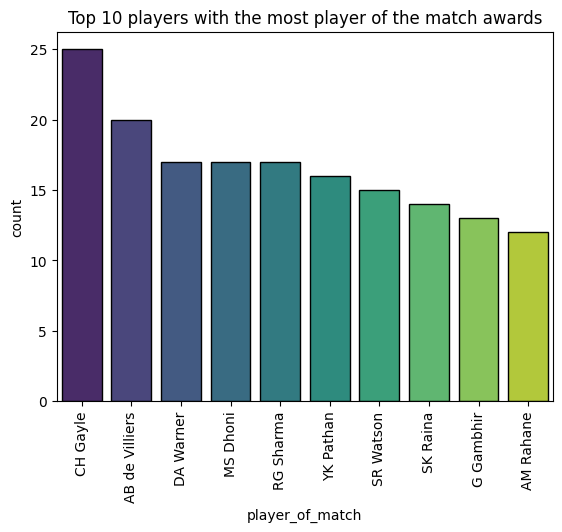

In [330]:
# Most player of the match awards sorted first 10
plt.title('Top 10 players with the most player of the match awards')
sns.barplot(x='player_of_match', y='count', 
            data=matches_df['player_of_match'].value_counts().reset_index().head(10),
            palette='viridis', edgecolor='black', hue="player_of_match")
plt.xticks(rotation='vertical')
plt.show()

Batting first vs Batting second, who wins more?

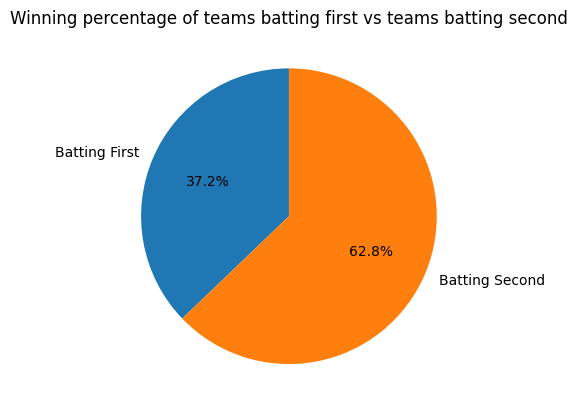

In [331]:
# Batting first vs Batting second, who wins more?
team1_2_winner = np.where(matches_df['team1'] == matches_df['winner'], 1, 2)
plt.title('Winning percentage of teams batting first vs teams batting second')
plt.pie([len(team1_2_winner[team1_2_winner == 1]), len(team1_2_winner[team1_2_winner == 2])], labels=['Batting First', 'Batting Second'], autopct='%1.1f%%', startangle=90)
plt.show()

Distribution of average runs scored in seasons

Team2 score will be always less than team1 score as team2 is always the chasing team.
We can see over the years the average score has increased.


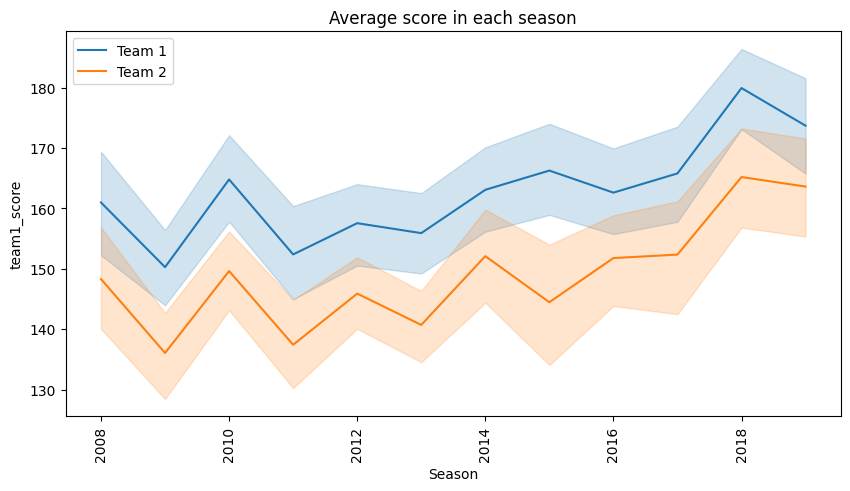

In [332]:
plt.figure(figsize=(10, 5))
plt.title('Average score in each season')
sns.lineplot(x='Season', y='team1_score', data=matches_df, label='Team 1')
sns.lineplot(x='Season', y='team2_score', data=matches_df, label='Team 2')
plt.xticks(rotation='vertical')
print("""Team2 score will be always less than team1 score as team2 is always the chasing team.
We can see over the years the average score has increased.""")
plt.show()


Distribution of number of sixes and fours hit in seasons

We can see the number of sixes hit has increased over the years.


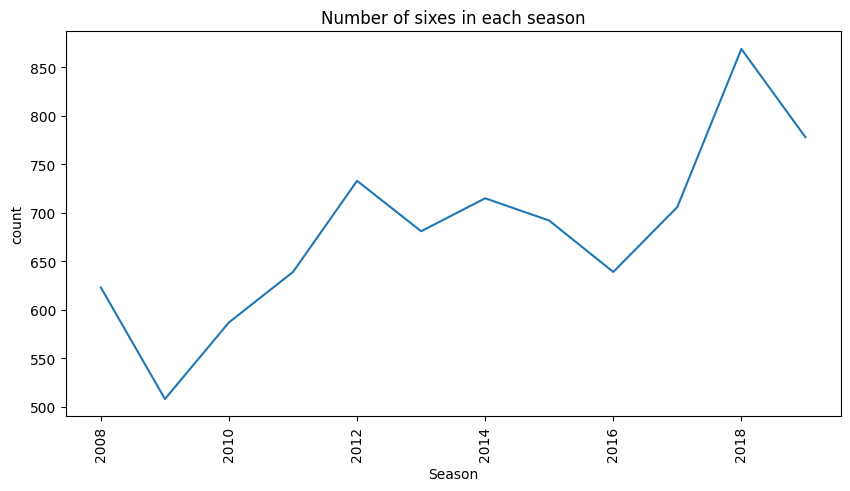

Number of fours hit does not show a clear trend over the years.


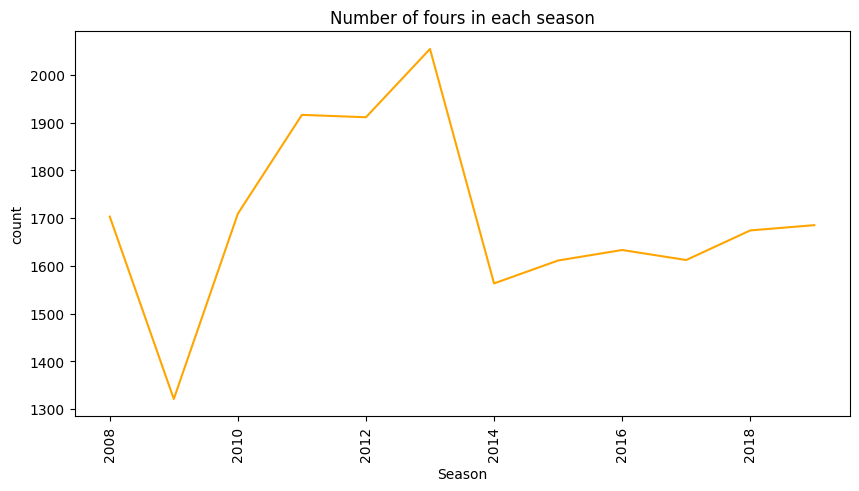

In [333]:
sixes_df = deliveries_df[deliveries_df['batsman_runs'] == 6]
fours_df = deliveries_df[deliveries_df['batsman_runs'] == 4]
sixes_df = sixes_df.groupby('Season').size().reset_index(name='count')
fours_df = fours_df.groupby('Season').size().reset_index(name='count')

plt.figure(figsize=(10, 5))
plt.title('Number of sixes in each season')
sns.lineplot(x='Season', y='count', data=sixes_df)
plt.xticks(rotation='vertical')
print("We can see the number of sixes hit has increased over the years.")
plt.show()

plt.figure(figsize=(10, 5))
plt.title('Number of fours in each season')
sns.lineplot(x='Season', y='count', data=fours_df, color="orange")
plt.xticks(rotation='vertical')
print("Number of fours hit does not show a clear trend over the years.")
plt.show()

Distribution of toss decisions in percentage

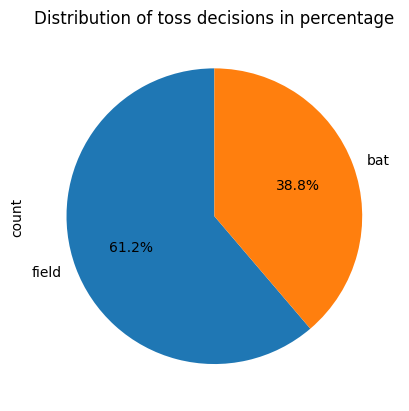

In [334]:
# Distribution of toss decisions in percentage
plt.title('Distribution of toss decisions in percentage')
matches_df['toss_decision'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.show()

# Hypothesis Testing

### 1. Finding Correlation between Average Runs and Strike Rates of Batsmen

Removing the outliers

In [335]:
# Keeping averages between 5 and 60 and strikerates between 50 and 180
runs_df = runs_df[(runs_df['average'] < 60) & (runs_df['average'] > 5)]
runs_df = runs_df[(runs_df['strikerate'] < 180) & (runs_df['strikerate'] > 50)]

Testing the correlation between average runs and strike rates

#### Hypothesis
**Ho:** There is no significant correlation between average runs and strike rates of batsmen  
**Ha:** There is a significant correlation between average runs and strike rates of batsmen

In [336]:
null_hypothesis = "here is no significant correlation between average runs and strike rates of batsmen"
alternative_hypothesis = "There is a significant correlation between average runs and strike rates of batsmen"
correlation_coefficient, p_value = pearsonr(runs_df['average'], runs_df['strikerate'])
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
# print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant correlation between Average and Strike Rate.")
    if correlation_coefficient > 0:
        print("The correlation is positive, indicating that higher Average is associated with higher Strike Rate.")
    else:
        print("The correlation is negative, indicating that higher Average is associated with lower Strike Rate.")
else:
    print("There is no significant correlation between Average and Strike Rate.")

Pearson Correlation Coefficient: 0.50
There is a significant correlation between Average and Strike Rate.
The correlation is positive, indicating that higher Average is associated with higher Strike Rate.


Graph between Average and Strike Rate

The scatter plot shows a positive correlation between Average and Strike Rate of batsmen.


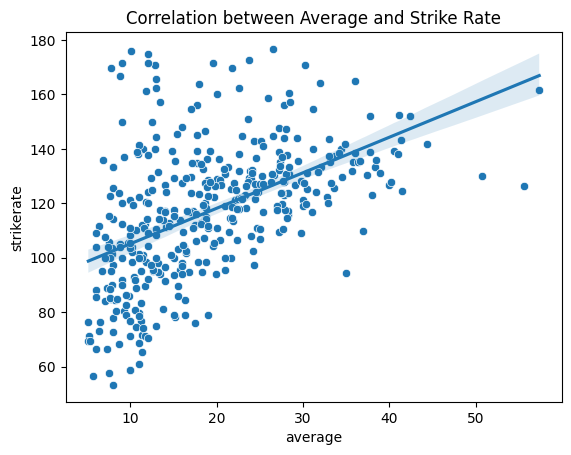

In [337]:
plt.title('Correlation between Average and Strike Rate')
sns.scatterplot(x='average', y='strikerate', data=runs_df)
sns.regplot(x='average', y='strikerate', data=runs_df, scatter=False)
print("The scatter plot shows a positive correlation between Average and Strike Rate of batsmen.")
plt.show()

## 2. Finding the toss effects on the match results

#### Hypothesis
**Ho:** There is no significant association between winning the toss and winning the match  
**Ha:** There is a significant association between winning the toss and winning the match

In [338]:
null_hypothesis = "There is no significant association between winning the toss and winning the match"
alternative_hypothesis = "There is a significant association between winning the toss and winning the match"
alpha = 0.05

contingency_table = pd.crosstab(matches_df['toss_winner'] == matches_df['winner'], matches_df['winner'])
contingency_table

winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad,draw
row_0,,,,,,,,,,,,,,,,
False,43,10,3,32,3,47,2,39,53,9,33,5,2,43,35,4
True,57,19,7,35,10,35,4,53,56,3,42,5,3,41,23,0


Testing the association between winning the toss and winning the match

In [339]:
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Interpret the p-value
alpha = 0.05
if p < alpha:
    print("There is a significant association between winning the toss and winning the match (reject the null hypothesis).")
else:
    print("There is no significant association between winning the toss and winning the match (fail to reject the null hypothesis).")

Chi-Square Statistic: 24.5509924160113
P-value: 0.056308133931884226
There is no significant association between winning the toss and winning the match (fail to reject the null hypothesis).


Graph between toss decision and match result

      toss_win_match_win  count
0  Toss Win & Match Loss    363
1   Toss Win & Match Win    393
The bar plot also supports our claim that winning the toss does not make a significant difference in winning the match.


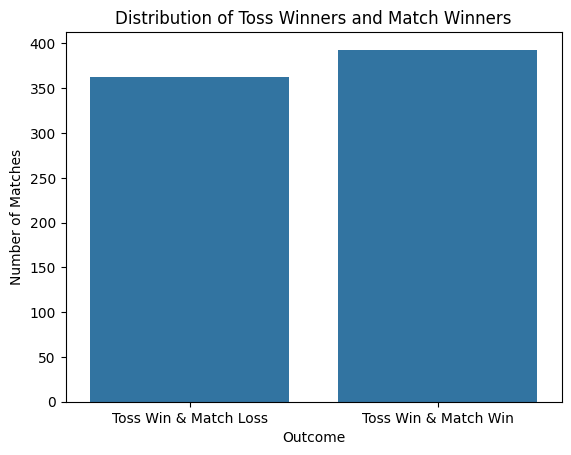

In [340]:
matches_df['toss_win_match_win'] = matches_df['toss_winner'] == matches_df['winner']

# Summarize the counts
summary_df = matches_df.groupby('toss_win_match_win').size().reset_index(name='count')
summary_df['toss_win_match_win'] = summary_df['toss_win_match_win'].map({True: 'Toss Win & Match Win', False: 'Toss Win & Match Loss'})

# Print the summary DataFrame
print(summary_df)

# Create the bar plot
sns.barplot(data=summary_df, x='toss_win_match_win', y='count')

# Add titles and labels
plt.title('Distribution of Toss Winners and Match Winners')
plt.xlabel('Outcome')
plt.ylabel('Number of Matches')
print("The bar plot also supports our claim that winning the toss does not make a significant difference in winning the match.")
# Show the plot
plt.show()

# Machine Learning

## Win predictor ball by ball in the second innings

#### Processing further data for Machine Learning Models

Adding total score in the first innings and cumulatively adding the score in the second innings

In [341]:
total_score_df = deliveries_df.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [342]:
match_df = matches_df.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')
match_df = match_df[match_df['dl_applied'] == 0]
match_df = match_df[['match_id','city','winner','total_runs']]
delivery_df = match_df.merge(deliveries_df,on='match_id')
delivery_df = delivery_df[delivery_df['inning'] == 2]
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [343]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,id,Season,current_score,runs_left,balls_left
122,77,Hyderabad,Kings XI Punjab,164,2,Kings XI Punjab,Deccan Chargers,1,1,SE Marsh,...,0,0,NaN,NaN,NaN,77,2008,0,164,119
123,77,Hyderabad,Kings XI Punjab,164,2,Kings XI Punjab,Deccan Chargers,1,2,SE Marsh,...,0,4,NaN,NaN,NaN,77,2008,4,160,118
124,77,Hyderabad,Kings XI Punjab,164,2,Kings XI Punjab,Deccan Chargers,1,3,SE Marsh,...,0,0,NaN,NaN,NaN,77,2008,4,160,117
125,77,Hyderabad,Kings XI Punjab,164,2,Kings XI Punjab,Deccan Chargers,1,4,SE Marsh,...,0,4,NaN,NaN,NaN,77,2008,8,156,116
126,77,Hyderabad,Kings XI Punjab,164,2,Kings XI Punjab,Deccan Chargers,1,5,SE Marsh,...,0,2,NaN,NaN,NaN,77,2008,10,154,115


Calculating number of wickets fallen in the second innings

In [344]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,id,Season,current_score,runs_left,balls_left,wickets
122,77,Hyderabad,Kings XI Punjab,164,2,Kings XI Punjab,Deccan Chargers,1,1,SE Marsh,...,0,0,NaN,NaN,77,2008,0,164,119,10
123,77,Hyderabad,Kings XI Punjab,164,2,Kings XI Punjab,Deccan Chargers,1,2,SE Marsh,...,4,0,NaN,NaN,77,2008,4,160,118,10
124,77,Hyderabad,Kings XI Punjab,164,2,Kings XI Punjab,Deccan Chargers,1,3,SE Marsh,...,0,0,NaN,NaN,77,2008,4,160,117,10
125,77,Hyderabad,Kings XI Punjab,164,2,Kings XI Punjab,Deccan Chargers,1,4,SE Marsh,...,4,0,NaN,NaN,77,2008,8,156,116,10
126,77,Hyderabad,Kings XI Punjab,164,2,Kings XI Punjab,Deccan Chargers,1,5,SE Marsh,...,2,0,NaN,NaN,77,2008,10,154,115,10


Calculating the current and required run rates

In [345]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

Adding the result column

In [346]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [347]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

Final processed dataframe for the model

In [348]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]
final_df.dropna(inplace=True)
final_df = final_df[final_df['balls_left'] != 0]

Shuffling the data

In [352]:
final_df = final_df.sample(final_df.shape[0], random_state=4)
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
31041,Mumbai Indians,Kolkata Knight Riders,Mumbai,98,84,10,155,9.5,7.0,1


#### Applying Machine Learning Model

In [361]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [354]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=4)

In [356]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough')

In [359]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [360]:
pipe.fit(X_train,y_train)

f:\University\5th Semester\Intro to Data Science\Semester_Project\ipl-env\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first'),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

### Accuracy of the model

In [362]:
y_pred = pipe.predict(X_test)
accuracy_score(y_test,y_pred)

0.811255778847061

### Showing the match results

In [371]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

def match_progression(x_df, match_id ,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target -",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']].reset_index(drop=True)
    return temp_df,target

In [378]:
temp_df,target = match_progression(delivery_df,75,pipe)
temp_df

Target - 137


,end_of_over,runs_after_over,wickets_in_over,lose,win
0,1,2,0,13.1,86.9
1,2,14,0,6.8,93.2
2,3,1,1,16.1,83.9
3,4,8,1,23.0,77.0
4,5,4,1,38.2,61.8
5,6,9,0,32.1,67.9
6,7,5,0,32.4,67.6
7,8,4,0,34.2,65.8
8,9,16,0,19.8,80.2
9,10,6,0,18.9,81.1


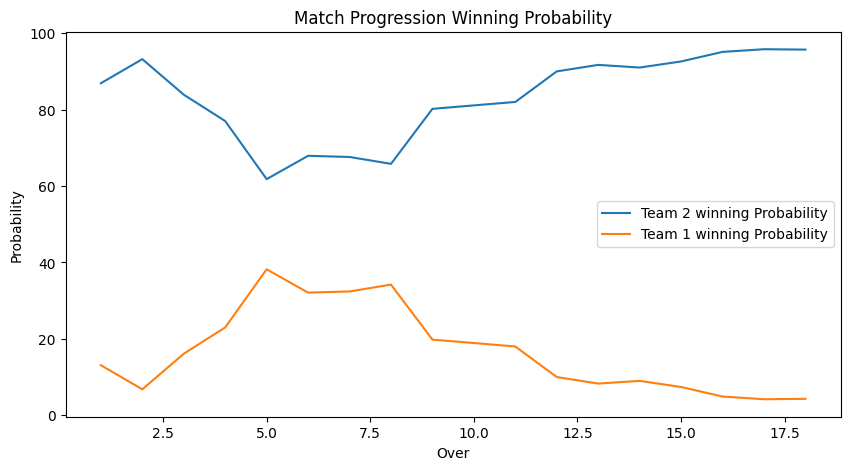

In [379]:
# Plotting the match progression winning probability
plt.figure(figsize=(10,5))
plt.title('Match Progression Winning Probability')
plt.plot(temp_df['end_of_over'],temp_df['win'],label='Team 2 winning Probability')
plt.plot(temp_df['end_of_over'],temp_df['lose'],label='Team 1 winning Probability')
plt.xlabel('Over')
plt.ylabel('Probability')
plt.legend()
plt.show()